### Finding Region with Peaks in the Solar Data (LOCAL MAXIMA)

In [80]:
from __future__ import print_function, division
import astropy.units as u
from scipy import ndimage
import matplotlib.pyplot as plt

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE
import scipy.signal

In [43]:
aiamap = sunpy.map.Map(AIA_193_IMAGE)

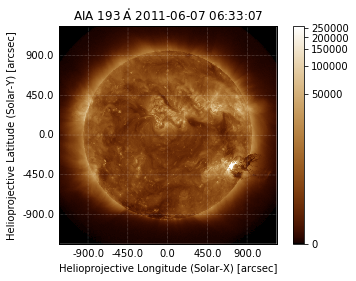

In [45]:
plt.figure()
aiamap.plot()
plt.colorbar()
plt.show()

In [46]:
y = (aiamap.data).reshape(-1)
x = [i for i in range(len(y))]


In [ ]:
indexes = scipy.signal.find_peaks_cwt(y, np.arange(10,2000), noise_perc=0.1)

### Plotting the aiamap data

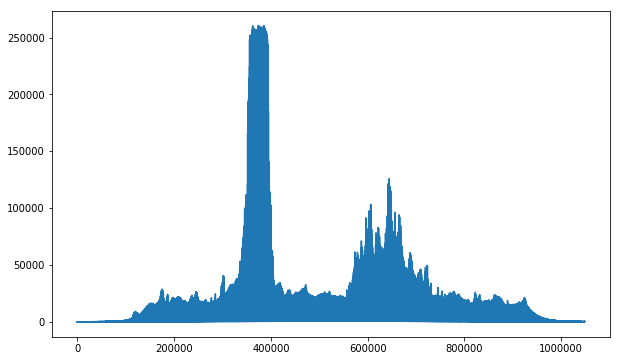

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()

### Finding local peaks in the data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


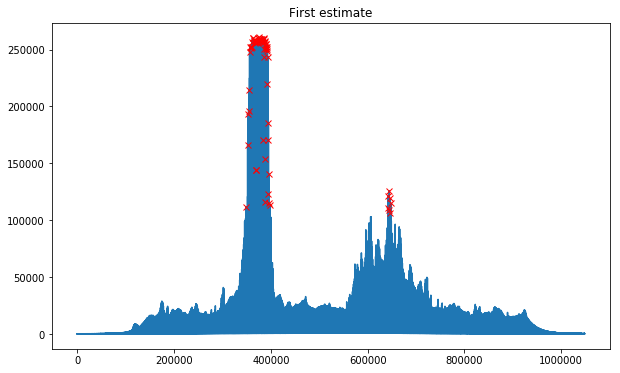

In [77]:
#indexes = peakutils.indexes(y, thres=0.4, min_dist=20)

print(indexes)
print(x, y[indexes])
plt.figure(figsize=(10,6))
plt.plot(np.array(x), y)
plt.plot(indexes,y[indexes],'bx',c='r')
plt.title('First estimate')
plt.show()

#### Finding the location

In [157]:
indexes

array([348958, 352040, 353064, 354088, 355096, 356120, 357144, 358168,
       359192, 360232, 361256, 362280, 363304, 364328, 365354, 366378,
       367400, 368429, 369453, 370469, 371493, 372520, 373544, 374568,
       375592, 376618, 377642, 378669, 379693, 380717, 381741, 382763,
       383784, 384808, 385832, 386856, 387882, 388906, 389928, 389960,
       390952, 391976, 393000, 394024, 395048, 396089, 397112, 398136,
       641752, 642785, 644831, 645855, 647890])

In [82]:
max_indices = np.unravel_index(indexes, aiamap.data.shape) * u.pixel

hpc_max = aiamap.pixel_to_data(max_indices[1], max_indices[0])

C:\Users\pratik\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SunpyDeprecationWarning: The pixel_to_data function is deprecated and may be removed in a future version.
        Use sunpy.map.GenericMap.pixel_to_world instead.
  This is separate from the ipykernel package so we can avoid doing imports until


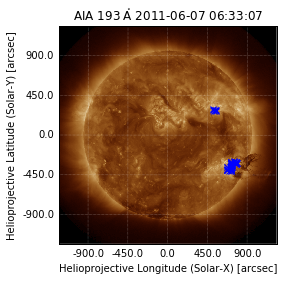

In [83]:
fig = plt.figure()
ax = plt.subplot(projection=aiamap)
aiamap.plot()
ax.plot_coord(hpc_max, 'bx')
plt.show()